In [48]:
                                 ###Bank Customer Churn Analysis & Prediction###

This project explores customer churn for a retail bank.  
Churn (when customers leave the bank) directly impacts revenue, also increases acquisition costs.  

**Objectives:**  
- Understand key factors influencing churn through exploratory analysis.  
- Build machine learning models to predict churn.  
- Provide actionable recommendations to retain high-value customers.  


SyntaxError: invalid syntax (2977134750.py, line 3)

In [10]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [49]:
#data manipulation
import pandas as pd
import numpy as np

#data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading datasets
df_customer = pd.read_excel(r"C:\Users\Dell\Desktop\Bank+Customer+Churn\Bank_Churn_Messy.xlsx", sheet_name = "Customer_Info")
df_account = pd.read_excel(r"C:\Users\Dell\Desktop\Bank+Customer+Churn\Bank_Churn_Messy.xlsx", sheet_name = "Account_Info")

print(df_customer.head())
print(df_account.head())

   CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0    15634602  Hargrave          619       FRA  Female  42.0       2   
1    15647311      Hill          608     Spain  Female  41.0       1   
2    15619304      Onio          502    French  Female  42.0       8   
3    15701354      Boni          699       FRA  Female  39.0       1   
4    15737888  Mitchell          850     Spain  Female  43.0       2   

  EstimatedSalary  
0      €101348.88  
1      €112542.58  
2      €113931.57  
3       €93826.63  
4        €79084.1  
   CustomerId    Balance  NumOfProducts HasCrCard  Tenure IsActiveMember  \
0    15634602       €0.0              1       Yes       2            Yes   
1    15634602       €0.0              1       Yes       2            Yes   
2    15647311  €83807.86              1       Yes       1            Yes   
3    15619304  €159660.8              3        No       8             No   
4    15701354       €0.0              2        No       1          

In [76]:
#shape and info
print("Customer Dataset Shape: ", df_customer.shape)
print("Account Dataset Shape: ", df_account.shape)

Customer Dataset Shape:  (10001, 8)
Account Dataset Shape:  (10002, 7)


In [77]:
print("Customer dataset Info: ", df_customer.info())
print("Account Dataset Info: ", df_account.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB
Customer dataset Info:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrC

In [78]:
df_customer.drop_duplicates()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52


In [79]:
df_account.drop_duplicates()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0
5,15737888,€125510.82,1,Yes,2,Yes,0
...,...,...,...,...,...,...,...
9996,15606229,€0.0,2,No,5,No,0
9997,15569892,€57369.61,1,Yes,10,Yes,0
9998,15584532,€0.0,1,Yes,7,Yes,1
9999,15682355,€75075.31,2,No,3,No,1


In [4]:
# keeping unique attributes in geography column
df_customer["Geography"] = df_customer["Geography"].astype(str).str.strip().str.title()
df_customer["Geography"] = df_customer["Geography"].replace({"Fra" : "France", "French" : "France"})
df_customer.head(10)
df_customer["Geography"].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
# replacing surname with ? with "unknown"
df_customer["Surname"] = df_customer["Surname"].replace(r".*\?", "Unknown", regex = True)

# Deleting rows with NAN age  
df_customer = df_customer.dropna(subset=["Age"])
df_customer["Age"].isnull().sum()

#removing euro and making estimated salary a float value
df_customer["EstimatedSalary"] = df_customer["EstimatedSalary"].replace({"€" : ""}, regex=True).astype(float)
df_customer.head(30)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58
2,15619304,Onio,502,France,Female,42.0,8,113931.57
3,15701354,Boni,699,France,Female,39.0,1,93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10
5,15574012,Chu,645,Spain,Male,44.0,8,149756.71
6,15592531,Bartlett,822,France,Male,50.0,7,10062.80
7,15656148,Obinna,376,Germany,Female,29.0,4,119346.88
8,15792365,He,501,France,Male,44.0,4,74940.50
9,15592389,Unknown,684,France,Male,27.0,2,71725.73


In [6]:

#removing euro and making estimated salary a float value
df_account["Balance"] = df_account["Balance"].replace({"€" : ""}, regex=True).astype(float)

# First clean up whitespace and formatting 
df_account["HasCrCard"] = df_account["HasCrCard"].astype(str).str.strip().str.title()
df_account["IsActiveMember"] = df_account["IsActiveMember"].astype(str).str.strip().str.title()

# Map Yes -> 1, No -> 0
df_account["HasCrCard"] = df_account["HasCrCard"].map({"Yes": 1, "No": 0})
df_account["IsActiveMember"] = df_account["IsActiveMember"].map({"Yes": 1, "No": 0})

print(df_account.head(5))

   CustomerId    Balance  NumOfProducts  HasCrCard  Tenure  IsActiveMember  \
0    15634602       0.00              1          1       2               1   
1    15634602       0.00              1          1       2               1   
2    15647311   83807.86              1          1       1               1   
3    15619304  159660.80              3          0       8               0   
4    15701354       0.00              2          0       1               0   

   Exited  
0       1  
1       1  
2       0  
3       1  
4       0  


In [7]:
df = pd.merge(df_customer, df_account, on="CustomerId", how="inner")
print(df.shape)
df.head()


(10001, 14)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,1,2,1,1
1,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,1,2,1,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,1,1,1,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,0,8,0,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,0,1,0,0


In [ ]:
### Data Cleaning Notes
- Standardized categorical fields (e.g., Geography → France/Spain/Germany).  
- Converted Yes/No fields into numeric 1/0.  
- Dropped irrelevant identifiers (CustomerId, Surname).  
- Verified duplicate Tenure columns (kept only one).  

➡️ Dataset is now ready for analysis and modeling.  


In [ ]:
                            
                                                  ###EDA PROCESS###
    

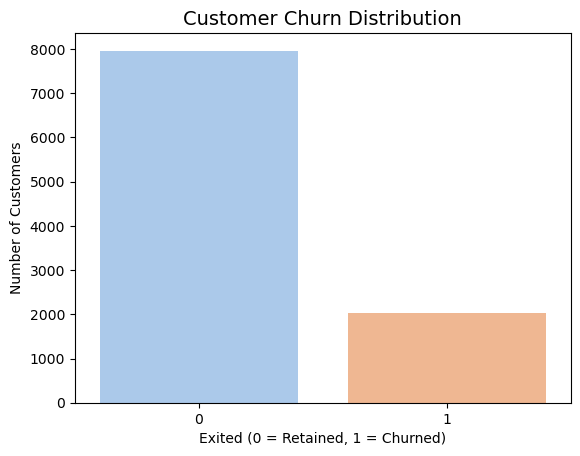

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of churn
sns.countplot(data=df, x="Exited", palette="pastel")

# Add labels
plt.title("Customer Churn Distribution", fontsize=14)
plt.xlabel("Exited (0 = Retained, 1 = Churned)")
plt.ylabel("Number of Customers")

plt.show()


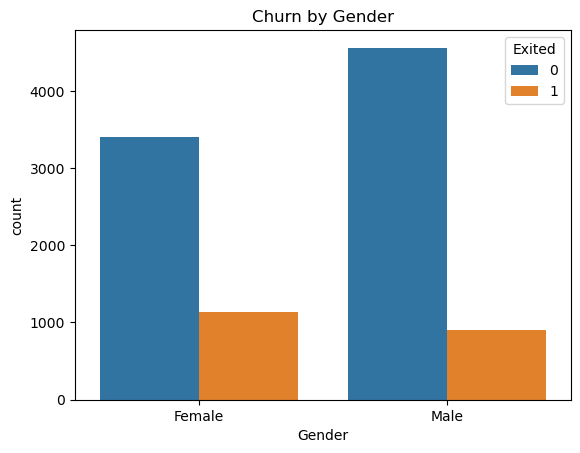

In [57]:
#DEMOGRAPHIC ANALYSIS
#Gender Vs Churn
sns.countplot(data=df, x="Gender", hue="Exited")
plt.title("Churn by Gender")
plt.show()

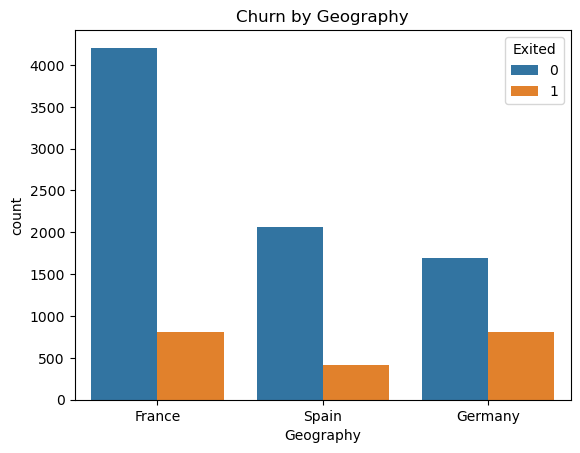

In [58]:
#Geography Vs Churn
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title("Churn by Geography")
plt.show()

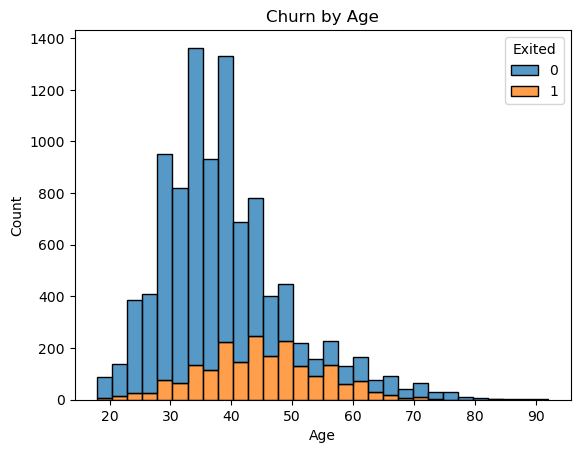

In [59]:
#Age Vs Churn
sns.histplot(data=df, x="Age", hue="Exited", multiple="stack", bins=30)
plt.title("Churn by Age")
plt.show()

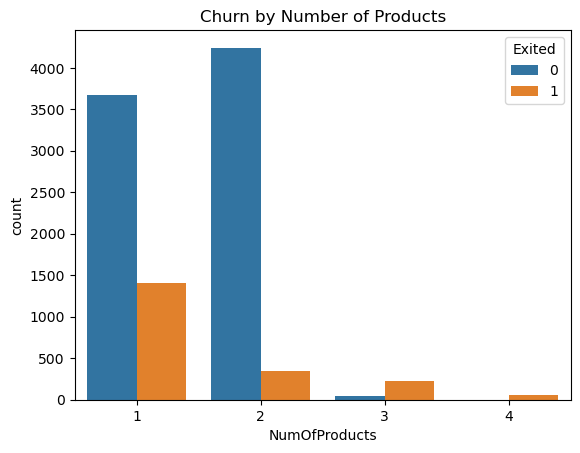

In [60]:
#ACCOUNT BEHAVIOUR
#Products Vs Churn
sns.countplot(data=df, x="NumOfProducts", hue="Exited")
plt.title("Churn by Number of Products")
plt.show()

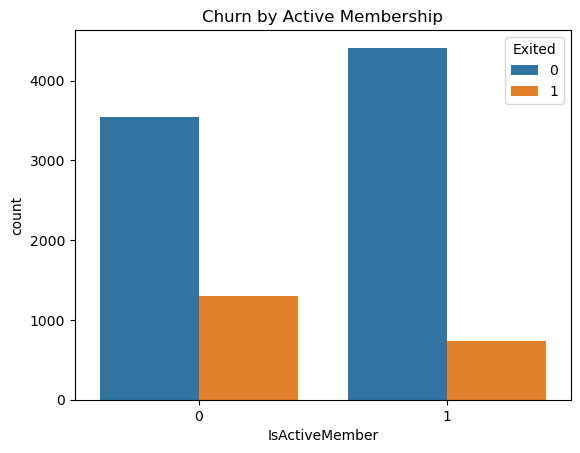

In [61]:
#ActiveMembers Vs Churn
sns.countplot(data=df, x="IsActiveMember", hue="Exited")
plt.title("Churn by Active Membership")
plt.show()

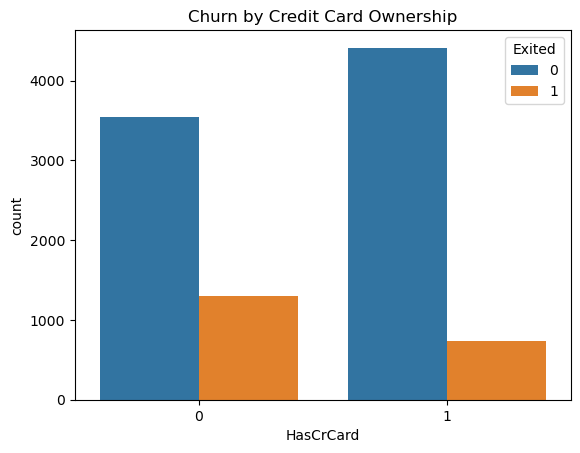

In [62]:
#Credit Vs Churn
sns.countplot(data=df, x="HasCrCard", hue="Exited")
plt.title("Churn by Credit Card Ownership")
plt.show()

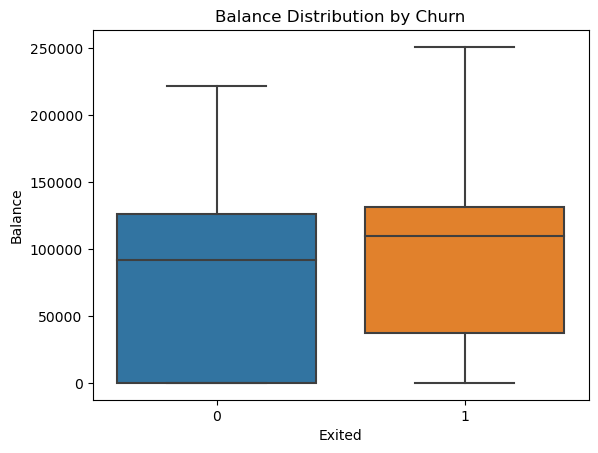

In [63]:
#FINANCIAL FEATURES
#Balance Vs Churn
sns.boxplot(data=df, x="Exited", y="Balance")
plt.title("Balance Distribution by Churn")
plt.show()

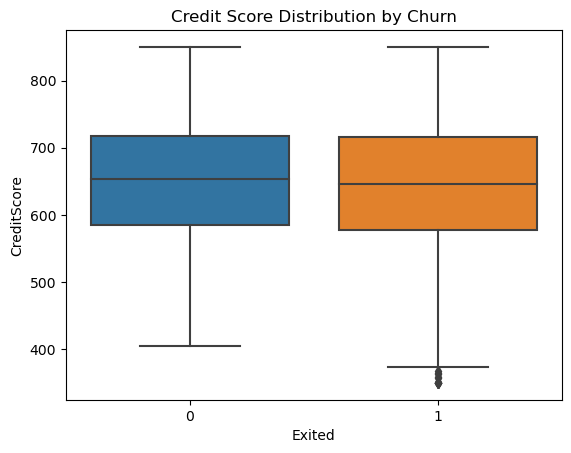

In [64]:
#Credit score Vs Churn
sns.boxplot(data=df, x="Exited", y="CreditScore")
plt.title("Credit Score Distribution by Churn")
plt.show()

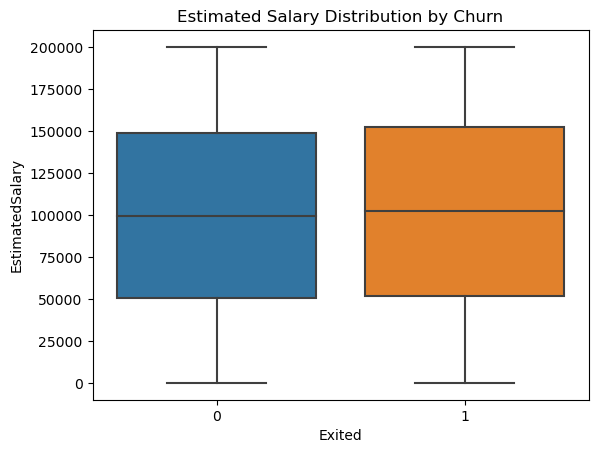

In [55]:
#EstiSalary Vs Churn
sns.boxplot(data=df, x="Exited", y="EstimatedSalary")
plt.title("Estimated Salary Distribution by Churn")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_9064\3764314870.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


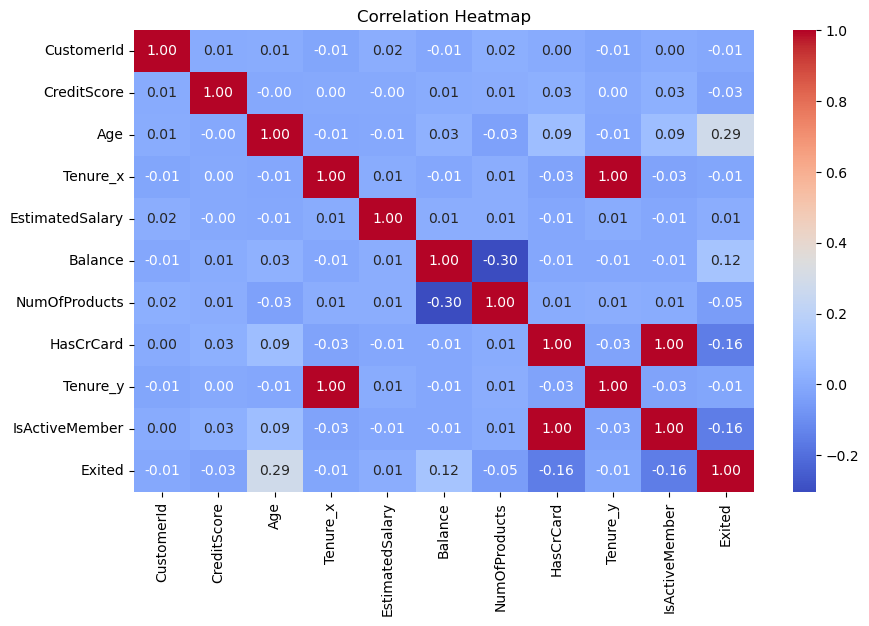

In [65]:
#CORRELATION HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
### Correlation Insights
- Number of Products is "negatively correlated" with churn → customers with more products are more loyal.  
- Balance shows a slight positive correlation with churn → customers holding high balances may still leave.  
- Age and Credit Score also play moderate roles in churn.  

➡️ The bank can "cross-sell products" and "reward long-tenure customers" to reduce churn risk.  


In [ ]:
                                               ###MODELING###

In [ ]:
### Modeling Approach
1. Start with Logistic Regression as a baseline.  
2. Move to tree-based models (Decision Tree, Random Forest).  
3. Test advanced boosting models (XGBoost/LightGBM) for higher accuracy.  
4. Evaluate with metrics beyond accuracy: Precision, Recall, F1-score, ROC-AUC.  


In [98]:
print(df.head())

   CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure_x  \
0    15634602  Hargrave          619    France  Female  42.0         2   
1    15634602  Hargrave          619    France  Female  42.0         2   
2    15647311      Hill          608     Spain  Female  41.0         1   
3    15619304      Onio          502    France  Female  42.0         8   
4    15701354      Boni          699    France  Female  39.0         1   

   EstimatedSalary    Balance  NumOfProducts  HasCrCard  Tenure_y  \
0        101348.88       0.00              1          1         2   
1        101348.88       0.00              1          1         2   
2        112542.58   83807.86              1          1         1   
3        113931.57  159660.80              3          0         8   
4         93826.63       0.00              2          0         1   

   IsActiveMember  Exited  
0               1       1  
1               1       1  
2               1       0  
3               0       1  


In [8]:
print(df.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'Tenure_y', 'IsActiveMember', 'Exited'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Drop irrelevant columns
df_model = df.drop(columns=["CustomerId", "Surname", "Tenure_x", "Tenure_y"], errors="ignore")

# One-hot encode categorical features (drop_first avoids dummy trap)
df_model = pd.get_dummies(df_model, columns=["Geography", "Gender"], drop_first=True)

# Features and target
X = df_model.drop("Exited", axis=1)
y = df_model["Exited"]

# Train-test split (80-20, stratified to keep churn ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8000, 10)
Test shape: (2001, 10)


Accuracy: 0.665167416291854

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76      1593
           1       0.33      0.64      0.44       408

    accuracy                           0.67      2001
   macro avg       0.61      0.66      0.60      2001
weighted avg       0.77      0.67      0.70      2001



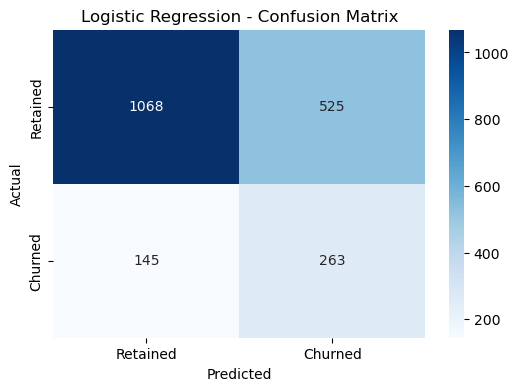

In [10]:
###LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

# Train
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Retained", "Churned"], yticklabels=["Retained", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [ ]:
### Business Insights from Logistic Regression
- The model achieves ~66% accuracy but struggles with imbalance between churners and non-churners.  
- "Strength": It identifies a good number of actual churners (263), enabling proactive retention efforts.  
- "Weakness": It produces many false positives (525), meaning loyal customers may be mistakenly targeted with churn-prevention offers, leading to unnecessary costs.  
- "Risk": 145 churners go undetected, which represents lost opportunities for retention.  


Accuracy: 0.8530734632683659

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.73      0.44      0.55       408

    accuracy                           0.85      2001
   macro avg       0.80      0.70      0.73      2001
weighted avg       0.84      0.85      0.84      2001



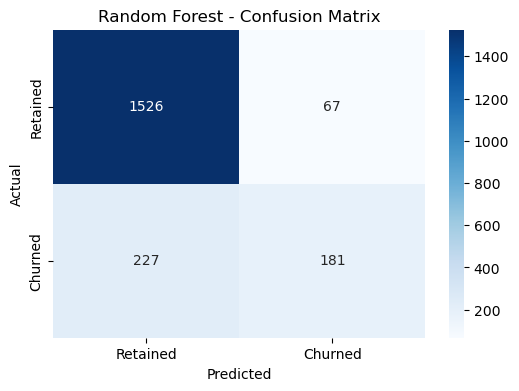

In [11]:
###RANDOM FOREST MODEL 

# 1. Import the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,          # trees grow fully unless limited
    class_weight="balanced", # handles class imbalance
    random_state=42,
    n_jobs=-1                # use all CPU cores for faster training
)

# 3. Train on training data
rf.fit(X_train, y_train)

# 4. Make predictions
y_pred_rf = rf.predict(X_test)

# 5. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Retained", "Churned"], yticklabels=["Retained", "Churned"])
plt.title("Random Forest - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [ ]:
###Business Insights from Random Forest
"Logistic Regression" gave us 66% accuracy but failed to capture churners (recall only 0.64).
"Random Forest" improved accuracy to 85%, with strong performance on retained customers and better precision for churners.
However, recall for churners is still low (0.44), meaning further techniques 
(SMOTE, class weights, or advanced models like XGBoost) may help improve churn detection.

Accuracy: 0.8175912043978011

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      1593
           1       0.54      0.75      0.62       408

    accuracy                           0.82      2001
   macro avg       0.73      0.79      0.75      2001
weighted avg       0.85      0.82      0.83      2001



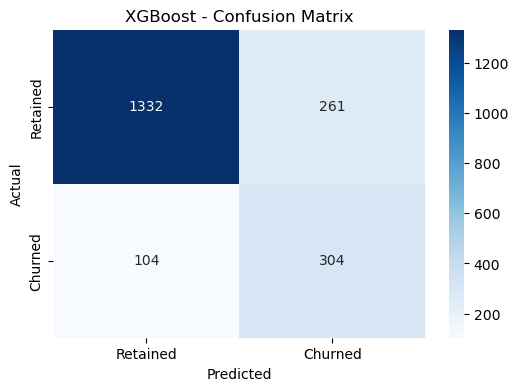

In [12]:
# XGBOOST MODEL for Customer Churn Prediction

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize XGBoost classifier
xgb = XGBClassifier(
    n_estimators=200,      # number of trees
    learning_rate=0.05,    # smaller learning rate for better accuracy
    max_depth=5,           # max depth of each tree
    subsample=0.8,         # sample fraction of rows
    colsample_bytree=0.8,  # sample fraction of features
    random_state=42,
    scale_pos_weight=4     # handle class imbalance (tune this)
)

# Train model
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Retained", "Churned"],
            yticklabels=["Retained", "Churned"])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
                                                ###BUSINESS TAKEAWAYS###

In [13]:
import pandas as pd

# Store results from all models
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.665, 0.853, 0.818],
    "Precision (Churn)": [0.33, 0.73, 0.54],
    "Recall (Churn)": [0.64, 0.44, 0.75],
    "F1-Score (Churn)": [0.44, 0.55, 0.62]
}

df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  Precision (Churn)  Recall (Churn)  \
0  Logistic Regression     0.665               0.33            0.64   
1        Random Forest     0.853               0.73            0.44   
2              XGBoost     0.818               0.54            0.75   

   F1-Score (Churn)  
0              0.44  
1              0.55  
2              0.62  


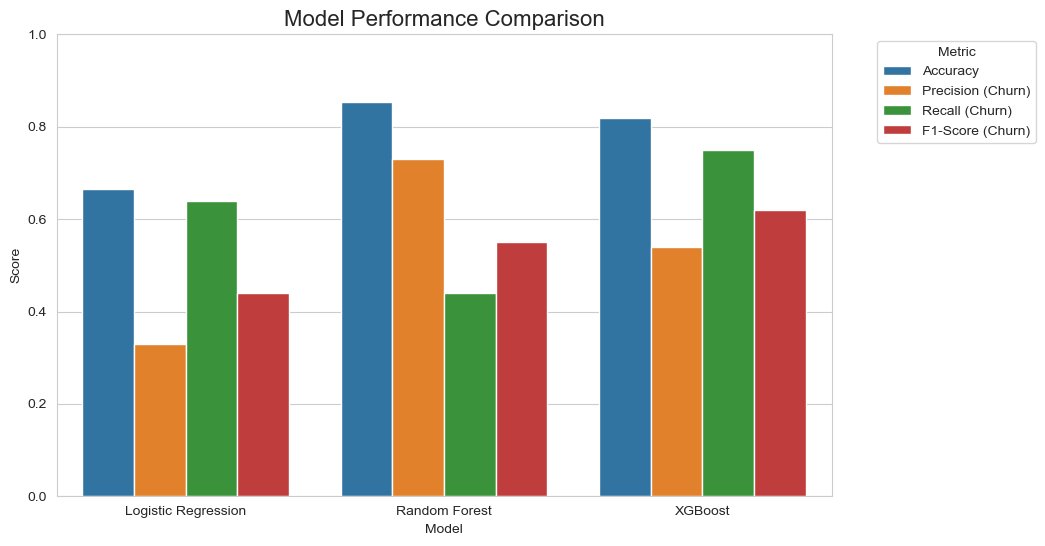

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model performance comparison
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.665, 0.853, 0.818],
    "Precision (Churn)": [0.33, 0.73, 0.54],
    "Recall (Churn)": [0.64, 0.44, 0.75],
    "F1-Score (Churn)": [0.44, 0.55, 0.62]
}

df_results = pd.DataFrame(results)

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

# Melt the DataFrame for seaborn compatibility
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Draw barplot
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison", fontsize=16)
plt.ylim(0,1)
plt.ylabel("Score")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
Logistic Regression → Very simple model, but "fails to capture churners well". Not reliable for business.

Random Forest → Strong accuracy and precision, "but misses many actual churners" (low recall = 44%).

XGBoost → Slightly lower accuracy than Random Forest, but "best recall (75%)", meaning it catches more churners.

In [ ]:
## Project Summary: From Model to Actionable Recommendations

### Model Development
We trained three models (Logistic Regression, Random Forest, XGBoost) to predict customer churn.  
- "XGBoost" was chosen as the final model for its high recall (75%), ensuring the majority of churners are captured.  
- This helps the bank minimize missed churn cases, which is critical for customer retention.  

---

### Business Layer
Churn predictions alone are not enough.  
We combined model outputs (churn probabilities) with business value features such as:  
- Balance and Estimated Salary → proxy for customer profitability.  
- Tenure, NumOfProducts, IsActiveMember, CreditScore → explain why customers may be leaving.  

This allowed us to identify "high-value customers most at risk of churn".  

---

### Actionable Recommendations
Based on model predictions and customer profiles:  
- "High-balance / high-salary customers at risk" → Offer VIP retention packages, or premium support.  
- "Inactive members (IsActiveMember = 0)" → Run personalized re-engagement campaigns (cashback, loyalty rewards).  
- "Single-product customers (NumOfProducts = 1)" → Cross-sell additional products to increase retention rate.  
- "Low credit score customers (<600)" → Provide financial advisory, flexible loan products, and credit repair solutions.  
- "Long-tenure customers flagged at risk" → Offer loyalty recognition (exclusive perks, relationship manager support).  

---

### Final Takeaway
By integrating machine learning predictions (XGBoost) with customer value segmentation, the bank can prioritize retention efforts where they matter most.  
This approach ensures that:  
1. High-risk churners are identified early (via the model).  
2. Resources are focused on profitable customers (via segmentation).  
3. Targeted strategies improve retention, boosting customer lifetime value and reducing revenue loss.  
